<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Santiago Haberle
- Nombre de alumno 2: Francisco Márquez

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/fco-marquez/MDS7202_Free_Riders)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Miercoles a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [4]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [5]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [6]:
#Codigo Aqui

df_homero = pd.read_csv('energia_homero.csv')
df_homero['date'] = pd.to_datetime(df_homero['date'])
df_homero.head()

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


In [7]:
px.line(df_homero, x='date', y='Energy_kWh', title='Consumo energético de Homero Simpson')

c:\Users\fmarq\miniconda3\envs\py310\lib\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

### 1.2.0

In [8]:
#CODIGO AQUI

df_homero["set"] = np.where(df_homero.date <= pd.Timestamp('2020-02-29'), 'Train', 'Test')

target = 'Energy_kWh'

homero_train = df_homero[df_homero['set'] == 'Train'].copy()
homero_test = df_homero[df_homero['set'] == 'Test'].copy()

X_homero_train = homero_train.drop(columns = ['set', target])
y_homero_train = homero_train[target].copy()

X_homero_test = homero_test.drop(columns = ['set', target])
y_homero_test = homero_test[target].copy()


In [9]:
print(f'% destinado a train: {len(X_homero_train) / len(df_homero):.2f}')
print(f'% destinado a test: {len(y_homero_test) / len(df_homero):.2f}')

% destinado a train: 0.91
% destinado a test: 0.09


### 1.2.1

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):

        self.init_date = None

    def fit(self, X, y=None):

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

        return self

    def transform(self, X):

        X = X.copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

    def fit_transform(self, X, y=None):

        X = X.copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

transformer = TimeTransformer()
transformer.fit_transform(X_homero_train)

,trend
0,0
1,1
2,2
3,3
4,4
...,...
1364,1364
1365,1365
1366,1366
1367,1367


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline_trend = Pipeline([
    ('time_features', TimeTransformer()),
    ('ols', LinearRegression())
])


### 1.2.2

In [12]:

pipeline_trend.fit(X_homero_train, y_homero_train)
train_pred = pipeline_trend.predict(X_homero_train)
test_pred = pipeline_trend.predict(X_homero_test)

y_pred = np.concatenate([train_pred, test_pred])

y_pred.shape



(1498,)

In [13]:
fig = px.scatter(df_homero, x=df_homero.date, y=target, title='Forecast de Consumo de Energía por Homero', color='set')
fig.add_scatter(x=df_homero.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

In [14]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_homero_train, train_pred)
mae_test = mean_absolute_error(y_homero_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')



MAE Train: 10.57
MAE Test: 8.66


### 1.2.3

In [15]:
error_train = y_homero_train - train_pred
error_test = y_homero_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df_homero.date, y=error, title='Error en la predicción', color = df_homero.set)
fig.show()

#### ¿Hay un comportamiento estacional en la serie? 

Sí, a partir del gráfico vemos un  claro comportamiento estacional, el cual está fuertemente ligado al comportamiento de los datos que vimos previamente. En los meses de mayor invierno hay una fuerte alza del consumo y por ende del error con respecto al modelo lineal, y a su vez en los meses de mayor verano baja drásticamente el consumo, teniendo un error comparable pero en el otro sentido.

### 1.2.4

In [16]:
class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, n = 4, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):

        '''
        Realiza el fit sobre los datos --> guarda la fecha de inicio de entrenamiento.
        '''

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

    def transform(self, X):

        '''
        Realiza el transform sobre el conjunto X, retornando los términos de fourier.
        '''

        X = X[['date']].copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.index[-1] # last date of X
        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):

        '''
        implementa el método fit y transform a la vez.
        '''

        X = X[['date']].copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):

        '''
        Obtiene los términos de fourier de una serie
        '''

        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index) # este paso es opcional

        return fourier

transformer = TimeTransformer(n = 4, p = 365)
transformer.fit_transform(X_homero_train)

,trend,fourier_0,fourier_1,fourier_2,fourier_3,fourier_4,fourier_5,fourier_6,fourier_7
0,0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,1,0.017213,0.999852,0.034422,0.999407,0.051620,0.998667,0.068802,0.997630
2,2,0.034422,0.999407,0.068802,0.997630,0.103102,0.994671,0.137279,0.990532
3,3,0.051620,0.998667,0.103102,0.994671,0.154309,0.988023,0.205104,0.978740
4,4,0.068802,0.997630,0.137279,0.990532,0.205104,0.978740,0.271958,0.962309
...,...,...,...,...,...,...,...,...,...
1364,1364,-0.996659,-0.081676,0.162807,-0.986658,0.970064,0.242850,-0.321270,0.946988
1365,1365,-0.997917,-0.064508,0.128748,-0.991677,0.981306,0.192452,-0.255353,0.966848
1366,1366,-0.998880,-0.047321,0.094537,-0.995521,0.989932,0.141540,-0.188227,0.982126
1367,1367,-0.999546,-0.030120,0.060213,-0.998186,0.995919,0.090252,-0.120208,0.992749


Aquí, vemos que el termino P de la periocidad estacional es claramente 365, pues tenemos datos diarios y esa es la cantidad de datos por año. Luego, para evitar hacer overfit, usar 4 componentes de fourier nos da un buen balance entre entre complejidad y ajuste.

In [17]:
Pipeline_seasonal = Pipeline([
    ('time_features', TimeTransformer(n = 4, p = 365)),
    ('ols', LinearRegression())
])


### 1.2.5

In [18]:

# entrenar y predecir
Pipeline_seasonal.fit(X_homero_train, y_homero_train)
train_pred = Pipeline_seasonal.predict(X_homero_train)
test_pred = Pipeline_seasonal.predict(X_homero_test)

y_pred = np.concatenate([train_pred, test_pred])

In [19]:
fig = px.scatter(df_homero, x=df_homero.date, y=target, title='Forecast de Temperaturas', color='set')
fig.add_scatter(x=df_homero.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

### 1.2.6

In [20]:
error_train = y_homero_train - train_pred
error_test = y_homero_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df_homero.date, y=error, title='Error en la predicción', color = df_homero.set)
fig.show()

Viendo el gráfico del error, vemos una clara mejoría en el desempeño de nuestro modelo. De igual forma se mantiene el comportamiento estacional y hay periodos con error particularmente alto, sin embargo existen periodos donde el error oscila cercano al 0 y en general la amplitud de los errores es más baja. De igual forma, es claro que los datos son muy ruidosos para obtener un desempeño perfecto.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [21]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

### 1.3.1

In [22]:
#CODIGO AQUI

X_homero_train.rename(columns={'date': 'ds'}, inplace=True)
X_homero_test.rename(columns={'date': 'ds'}, inplace=True)

y_homero_train.rename('y', inplace=True)
y_homero_test.rename('y', inplace=True)

1369    11.372
1370    10.883
1371     9.233
1372    10.178
1373     8.434
         ...  
1493    39.659
1494    38.071
1495    36.565
1496    39.900
1497    38.483
Name: y, Length: 129, dtype: float64

In [23]:
X_homero_train

,ds
0,2016-06-01
1,2016-06-02
2,2016-06-03
3,2016-06-04
4,2016-06-05
...,...
1364,2020-02-25
1365,2020-02-26
1366,2020-02-27
1367,2020-02-28


In [24]:
m = Prophet()
m.fit(pd.concat([X_homero_train, y_homero_train], axis=1))
forecast_train = m.predict(X_homero_train)
forecast = m.predict(X_homero_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
124,2020-07-03,29.918095,21.490761,39.003931
125,2020-07-04,31.746768,22.650940,40.668727
126,2020-07-05,32.443094,22.988001,41.212927
127,2020-07-06,30.517949,22.193092,39.150271
128,2020-07-07,30.145536,21.316936,38.918153


### 1.3.3

In [25]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

c:\Users\fmarq\miniconda3\envs\py310\lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



### 1.3.4

In [26]:
mae_train = mean_absolute_error(y_homero_train, forecast_train['yhat'])
mae_test = mean_absolute_error(y_homero_test, forecast['yhat'])

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 4.82
MAE Test: 4.93


### 1.3.5

In [27]:
df_homero

,date,Energy_kWh,set
0,2016-06-01,29.691,Train
1,2016-06-02,28.789,Train
2,2016-06-03,19.247,Train
3,2016-06-04,22.883,Train
4,2016-06-05,25.195,Train
...,...,...,...
1493,2020-07-03,39.659,Test
1494,2020-07-04,38.071,Test
1495,2020-07-05,36.565,Test
1496,2020-07-06,39.900,Test


In [28]:
error_train = y_homero_train.reset_index(drop=True) - forecast_train['yhat'].reset_index(drop=True)
error_test = y_homero_test.reset_index(drop=True) - forecast['yhat'].reset_index(drop=True)
error = pd.concat([error_train, error_test], ignore_index=True)

# graficamos errores
fig = px.line(x = df_homero.date, y=error, title='Error en la predicción', color = df_homero.set)
fig.show()



¿Hay un comportamiento estacional en la serie?

Sí, vemos un comportamiento muy similar al del apartado anterior con el modelo de fourier, demostrando mejorías por sobre el modelo lineal, pero aún no capta del todo la naturaleza errática del consumo en los meses de mayor frío o calor.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

### 1.4.0

In [29]:
#CODIGO AQUI
df_frink = pd.read_csv('datos_frink.csv')
df_frink['date'] = pd.to_datetime(df_frink['date'])
df_frink.rename(columns={'date': 'ds'}, inplace=True)

selected_vars = ['Temp_avg', 'Hum_avg'] 

train_data = pd.merge(
    pd.concat([X_homero_train, y_homero_train], axis=1),
    df_frink[['ds'] + selected_vars],
    left_on='ds',
    right_on='ds'
)

test_data = pd.merge(
    pd.concat([X_homero_test, y_homero_test], axis=1), 
    df_frink[['ds'] + selected_vars],
    left_on='ds',
    right_on='ds'
)

### 1.4.1

In [30]:
# Create and train Prophet model with regressors
m = Prophet()
for var in selected_vars:
    m.add_regressor(var)
    
# Fit model
m.fit(train_data)

# Create future dataframes for predictions
forecast_train = m.predict(train_data)
forecast_test = m.predict(test_data)

INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 1.4.2

In [31]:
fig1 = plot_plotly(m, forecast_test)
fig1.show()

# Plot components
fig2 = plot_components_plotly(m, forecast_test)
fig2.show()

c:\Users\fmarq\miniconda3\envs\py310\lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



### 1.4.3

In [32]:
# Calculate MAE
mae_train = mean_absolute_error(train_data['y'], forecast_train['yhat'])
mae_test = mean_absolute_error(test_data['y'], forecast_test['yhat'])

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 4.76
MAE Test: 4.55


### 1.4.4

In [33]:
# Calculate errors
error_train = train_data['y'].reset_index(drop=True) - forecast_train['yhat'].reset_index(drop=True)
error_test = test_data['y'].reset_index(drop=True) - forecast_test['yhat'].reset_index(drop=True)

# Create error DataFrame
error_df = pd.DataFrame({
    'date': pd.concat([train_data['ds'], test_data['ds']]).reset_index(drop=True),
    'error': pd.concat([error_train, error_test]).reset_index(drop=True),
    'set': ['Train']*len(train_data) + ['Test']*len(test_data)
})

# Plot errors
fig = px.line(error_df, x='date', y='error', title='Error en la predicción', color='set')
fig.show()

¿Hay un comportamiento estacional en la serie?
Nuevamente, Sí, vemos una leve mejora en la amplitud del error pero aún con el component estacional en como se maniefiesta el error a lo largo del año.

¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero?

 Viendo el MAE, vemos que efectivamente está mejorando el modelo, y tal como se dijo en la pregunta anterior, presenta una leve disminución de la amplitud en el error estacional. Este es una mejoría leve pero que indica un efecto positivo de la inclusión de estas nuevas variables.


## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

### 1.5.1

<Figure size 800x300 with 0 Axes>

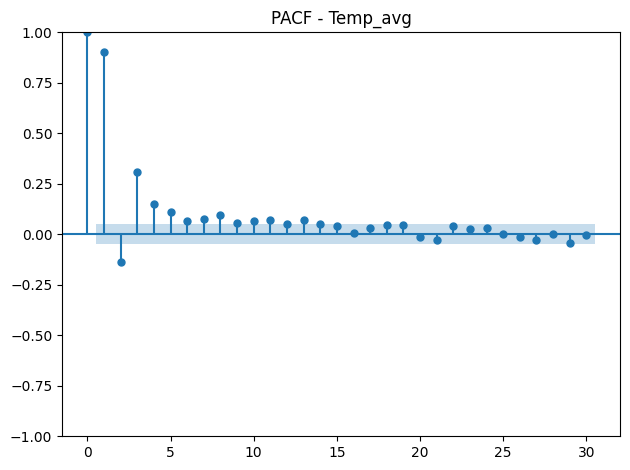

<Figure size 800x300 with 0 Axes>

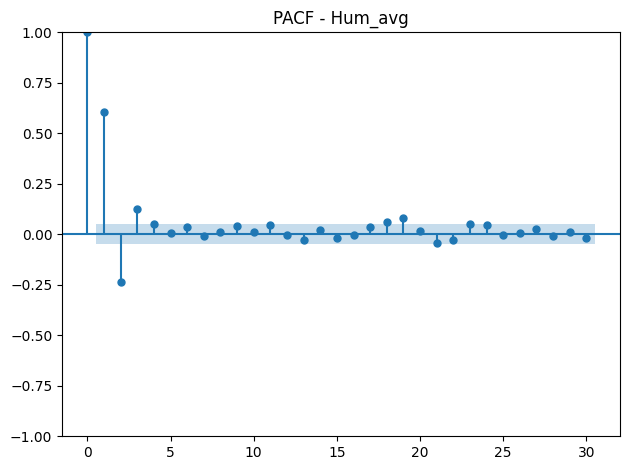

In [34]:
#CODIGO AQUI

from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

selected_vars = ['Temp_avg', 'Hum_avg']

for var in selected_vars:
    plt.figure(figsize=(8,3))
    plot_pacf(df_frink[var].dropna(), lags=30)
    plt.title(f'PACF - {var}')
    plt.tight_layout()
    plt.show()



Viendo ambos gráficos, es claro que debemos fijar los lags en la cantidad de días donde ya no aporte mayor información a la predicción futura. Para el caso de la temperatura se podría decir que un número prudente para esto es 9 y para la humedad es 4, siendo el siguiente punto despúes de estos que ya no representa un mayor aporte.

### 1.5.2 - 1.5.3 - 1.5.4

In [35]:
def get_lags_temp(X):
    lag_features = pd.DataFrame(index = X.index)
    lag_features['lag_temp'] = X.shift(1) # lag 1 de la serie
    lag_features['rolling_9'] = X.rolling(9).mean()

    return lag_features[['lag_temp', 'rolling_9']]

def get_lags_hum(X):
    lag_features = pd.DataFrame(index = X.index)
    lag_features['lag_hum'] = X.shift(1)
    lag_features['rolling_4'] = X.rolling(4).mean()

    return lag_features[['lag_hum', 'rolling_4']]

In [36]:
class LagFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, variable, lag_periods, rolling_periods):
        self.variable = variable
        self.lag_periods = lag_periods
        self.rolling_periods = rolling_periods
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X_copy = X.copy()
        
        # Create lag features
        for i in range(1, self.lag_periods + 1):
            X_copy[f'{self.variable}_lag{i}'] = X_copy[self.variable].shift(i)
            
        # Add rolling mean
        X_copy[f'{self.variable}_rolling_{self.rolling_periods}'] = (
            X_copy[self.variable].rolling(window=self.rolling_periods).mean()
        )
        
        return X_copy

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Temperature pipeline (9 lags from PACF)
temp_pipeline = Pipeline([
    ('lag_transformer', LagFeatureTransformer('Temp_avg', lag_periods=9, rolling_periods=9)),
    ('imputer', SimpleImputer(strategy='mean'))
])

# Humidity pipeline (4 lags from PACF)
hum_pipeline = Pipeline([
    ('lag_transformer', LagFeatureTransformer('Hum_avg', lag_periods=4, rolling_periods=4)),
    ('imputer', SimpleImputer(strategy='mean'))
])


In [38]:

from sklearn.preprocessing import FunctionTransformer

TempTransformer = FunctionTransformer(get_lags_temp)
HumTransformer = FunctionTransformer(get_lags_hum)

LagsTransformer.transform(X_homero_test['meantemp'])

NameError: name 'LagsTransformer' is not defined

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# definir latencia
latency = 2

# pipeline para generar rezagos
lag_pipeline = Pipeline([
    ('make_lags', LagsTransformer),
    ('imputer', SimpleImputer(strategy = 'mean')) # imputamos valores nulos por media para mantener las dimensiones de entrada
])

# col transformer para generar features
col_transformer = ColumnTransformer([
    ("time_features", TimeTransformer(), ["date"]),
    ("target_lags", lag_pipeline, target)
])

# generamos pipeline final
pipeline = Pipeline([
    ("column_transformer", col_transformer),
    ("model", LinearRegression())
])

pipeline

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [ ]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [ ]:
#CODIGO AQUI

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [39]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)


In [93]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [94]:
#CODIGO AQUI

df_cervezas = pd.read_csv('cervezas.csv')
df_cervezas.head()

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

### 2.1.1

In [95]:
# Exploratory Data Analysis for Section 2.1
import matplotlib.pyplot as plt
import seaborn as sns

num_users = df_cervezas['userId'].nunique()
num_products = df_cervezas['beerId'].nunique()
num_ratings = len(df_cervezas)
print(f"Cantidad de usuarios: {num_users}")
print(f"Cantidad de productos: {num_products}")
print(f"Cantidad de calificaciones: {num_ratings}")

calificaciones_faltantes = df_cervezas['rating'].isnull().sum()
print(f"Cantidad de calificaciones faltantes: {calificaciones_faltantes}")


Cantidad de usuarios: 706
Cantidad de productos: 3747
Cantidad de calificaciones: 295059
Cantidad de calificaciones faltantes: 0


Promedio de calificaciones: 3.86


Text(0.5, 1.0, 'Distribución de Calificaciones de Cervezas')

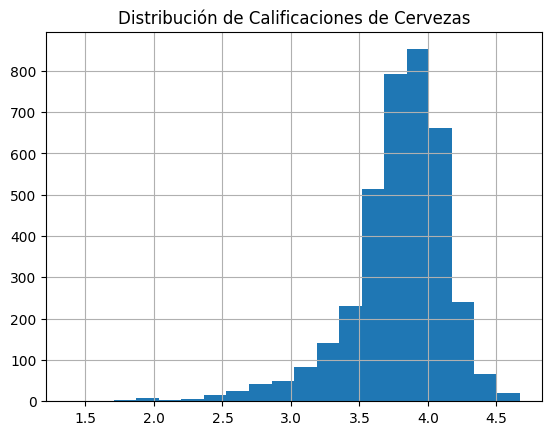

In [97]:
promedio_calificaciones = df_cervezas['rating'].mean()
print(f"Promedio de calificaciones: {promedio_calificaciones:.2f}")

df_cervezas.groupby('beerId')['rating'].mean().hist(bins=20)
plt.title('Distribución de Calificaciones de Cervezas')

Así, con lo anterior podemos responder que existen 706 usuarios únicos, 3747 productos y un total de 295059 ratings. Hecho esto, podemos inspeccionar el rating de cada uno de estas calificaciones, y podemos notar que no exite ningún caso de rating faltante.

Luego, vemos un promedio global de 3.86, mientras que analizando un histograma del promedio en rating de cada producto, vemos que claramente se sigue de buena forma una distribución normal en torno a un poco menos de 4.

### 2.1.2

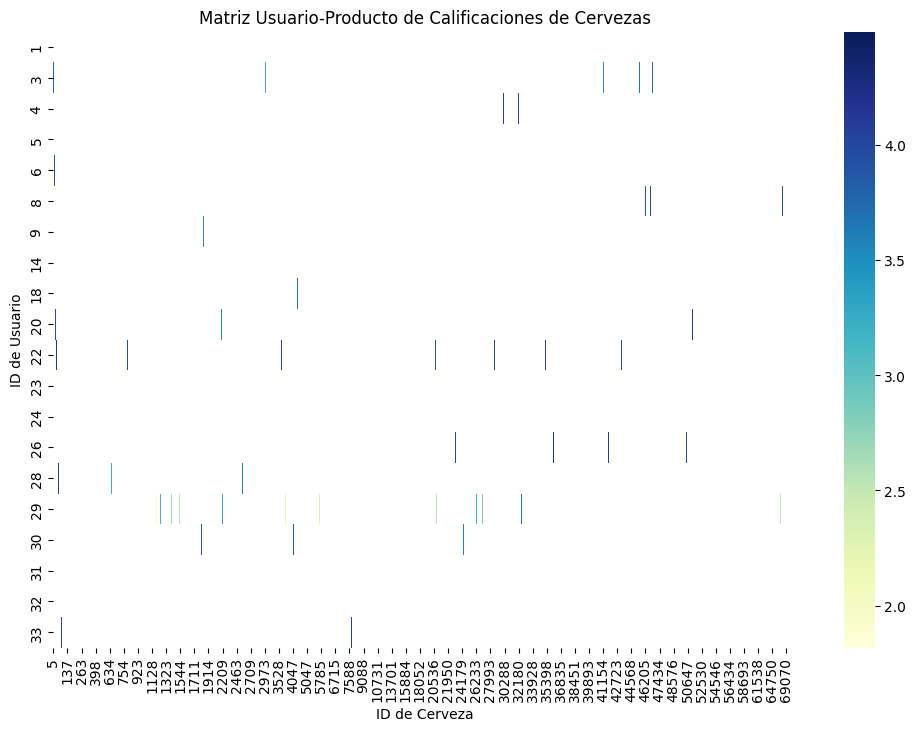

In [98]:
user_product_matrix = df_cervezas.pivot_table(index='userId', columns='beerId', values='rating')
plt.figure(figsize=(12, 8))
sns.heatmap(user_product_matrix.head(20), cmap="YlGnBu", cbar=True)
plt.title('Matriz Usuario-Producto de Calificaciones de Cervezas')
plt.xlabel('ID de Cerveza')
plt.ylabel('ID de Usuario')
plt.show()

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

### 2.2.1

In [99]:
#CODIGO AQUI

cervezas_features = df_cervezas[['userId','beerId', 'beerName', 'beerStyle']].drop_duplicates()
cervezas_features.head()

,userId,beerId,beerName,beerStyle
0,144,995,Mai Bock,Maibock / Helles Bock
1,63,58695,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,Sierra Nevada Celebration Ale,American IPA


### 2.2.2

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

# Inicializar vectorizador
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=10
)

# Ajustar y transformar la columna beerStyle
bow_matrix = vectorizer.fit_transform(cervezas_features['beerStyle']).toarray()

cervezas_features = cervezas_features.reset_index(drop=True)

# Convertir a DataFrame
bow_df = pd.DataFrame(
    bow_matrix,
    columns=vectorizer.get_feature_names_out(),
    index=cervezas_features['beerName']
)

bow_df.head()


,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
beerName,,,,,,,,,,,,,,,,,,,,,
Mai Bock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hop In The Dark Cascadian Dark Ale,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Stone Ruination IPA,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Noël Des Géants,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Sierra Nevada Celebration Ale,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2.3

In [108]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular similitud coseno entre todas las cervezas
similarity_matrix = cosine_similarity(bow_df, bow_df)

# Crear DataFrame de similitud para fácil lectura
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=bow_df.index,
    columns=bow_df.index
)

def top_similares(df = cervezas_features, nombre_cerveza = 'Chocolate Porter', n=5):
    assert nombre_cerveza in similarity_df.columns, f"La cerveza '{nombre_cerveza}' no está en el dataset."

    cerveza_id = df[df['beerName'] == nombre_cerveza].index[0]

    sim_scores = list(enumerate(similarity_matrix[cerveza_id]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1: n+1]

    ids_cervezas = [i[0] for i in sim_scores]

    # Return the top k most similar movies
    return df['beerName'].iloc[ids_cervezas].values

top_similares(nombre_cerveza='Chocolate Porter', n=5)


array(['Great Lakes Edmund Fitzgerald Porter', 'Perseus Porter',
       'Southampton Imperial Porter',
       'Kona Coffee Macadamia Coconut Porter', 'Black Marlin Porter'],
      dtype=object)

### 2..2.4

In [110]:
carl = 100 # usuario a recomendar
cervezas_carl = df_cervezas[df_cervezas['userId'] == carl].sort_values('rating', ascending = False)
mejor_cerveza = cervezas_carl.iloc[0]['beerName'] # película con mejor rating
print(f'cerveza favorita de carl: {mejor_cerveza}')

# finalmente, printeamos las k mejores recomendaciones para el usuario
top_similares(nombre_cerveza=mejor_cerveza)



cerveza favorita de carl: McNeill's Firehouse Amber Ale


array(['Grail Ale', "Santa's Private Reserve Ale",
       'Hemp Hop Rye Amber Ale', 'Autumn Fest', 'Red Rocket Ale'],
      dtype=object)

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

### 2.3.1.1

In [111]:
#CODIGO AQUI

reader = Reader(rating_scale = (0, 5)) # instanciamos reader, es importante definir la escala de los valores (ratings)

df_collaborative = df_cervezas[['userId', 'beerId', 'rating']].copy()
dataset = Dataset.load_from_df(df_collaborative, reader)
dataset

Aquí vemos que el orden no importa en este caso, ya que el objeto Dataset se encarga de procesar los datos independientemente del orden en que se encuentren en el DataFrame.

### 2.3.1.2

In [112]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data = dataset, test_size = 0.3, random_state = 1892)
trainset

### 2.3.1.3

In [113]:
from surprise import KNNBasic
from surprise.accuracy import mae

# Configuración para similitud coseno
sim_options = {
    'name': 'cosine',
    'user_based': True  # Basado en usuarios
}

# Entrenar modelo KNN basado en usuarios
knn_user = KNNBasic(sim_options=sim_options)
knn_user.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_user = knn_user.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.


### 2.3.1.4

In [114]:
# Calcular MAE
mae_user = mae(predictions_user)
print(f"MAE del modelo KNN basado en usuarios: {mae_user:.4f}")

# Mostrar predicciones en un DataFrame
predictions_user_df = pd.DataFrame([
    {
        'userId': pred.uid,
        'beerId': pred.iid,
        'rating_real': pred.r_ui,
        'rating_predicho': pred.est
    }
    for pred in predictions_user
])

predictions_user_df.head()

MAE:  0.4646
MAE del modelo KNN basado en usuarios: 0.4646


,userId,beerId,rating_real,rating_predicho
0,922,8045,4.5,4.137500
1,141,28305,5.0,4.025000
2,91,266,3.5,2.937500
3,412,26383,4.0,4.119048
4,112,403,3.5,3.837500


### 2.3.1.5

In [115]:
# Configuración para similitud coseno
sim_options = {
    'name': 'cosine',
    'user_based': False  # Basado en productos
}

# Entrenar modelo KNN basado en productos
knn_item = KNNBasic(sim_options=sim_options)
knn_item.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_item = knn_item.test(testset)

# Calcular MAE
mae_item = mae(predictions_item)
print(f"MAE del modelo KNN basado en productos: {mae_item:.4f}")

# Mostrar predicciones en un DataFrame
predictions_item_df = pd.DataFrame([
    {
        'userId': pred.uid,
        'beerId': pred.iid,
        'rating_real': pred.r_ui,
        'rating_predicho': pred.est
    }
    for pred in predictions_item
])

predictions_item_df.head()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
MAE:  0.4648
MAE del modelo KNN basado en productos: 0.4648
MAE:  0.4648
MAE del modelo KNN basado en productos: 0.4648


,userId,beerId,rating_real,rating_predicho
0,922,8045,4.5,4.137500
1,141,28305,5.0,4.025000
2,91,266,3.5,2.937500
3,412,26383,4.0,4.174496
4,112,403,3.5,3.837500


### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

### 2.3.2.1

In [116]:
#CODIGO AQUI
from surprise import NMF

# Entrenar modelo NMF
nmf_model = NMF(random_state=1892)
nmf_model.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_nmf = nmf_model.test(testset)

### 2.3.2.2

In [117]:
# Calcular MAE
mae_nmf = mae(predictions_nmf)
print(f"MAE del modelo NMF: {mae_nmf:.4f}")

# Mostrar predicciones en un DataFrame
predictions_nmf_df = pd.DataFrame([
    {
        'userId': pred.uid,
        'beerId': pred.iid,
        'rating_real': pred.r_ui,
        'rating_predicho': pred.est
    }
    for pred in predictions_nmf
])

predictions_nmf_df.head()

MAE:  0.4833
MAE del modelo NMF: 0.4833


,userId,beerId,rating_real,rating_predicho
0,922,8045,4.5,4.166962
1,141,28305,5.0,3.793366
2,91,266,3.5,2.918220
3,412,26383,4.0,3.895465
4,112,403,3.5,3.923176


### 2.3.2.3

In [118]:
from surprise import SVD

# Entrenar modelo SVD
svd_model = SVD(random_state=1892)
svd_model.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_svd = svd_model.test(testset)

### 2.3.2.4

In [119]:
# Calcular MAE
mae_svd = mae(predictions_svd)
print(f"MAE del modelo SVD: {mae_svd:.4f}")

# Mostrar predicciones en un DataFrame
predictions_svd_df = pd.DataFrame([
    {
        'userId': pred.uid,
        'beerId': pred.iid,
        'rating_real': pred.r_ui,
        'rating_predicho': pred.est
    }
    for pred in predictions_svd
])

predictions_svd_df.head()

MAE:  0.4611
MAE del modelo SVD: 0.4611


,userId,beerId,rating_real,rating_predicho
0,922,8045,4.5,4.137611
1,141,28305,5.0,3.943075
2,91,266,3.5,2.827803
3,412,26383,4.0,4.115323
4,112,403,3.5,3.837711


### 2.3.2.5

Según el MAE de ambos modelos, el modelo SVD tiene un mejor desempeño que el NMF, con un error más bajo en las predicciones. Esto indica que el SVD logra capturar mejor las relaciones entre usuarios y cervezas en este conjunto de datos. Aunque la diferencia en el MAE es pequeña, el SVD demuestra ser más preciso y, por lo tanto, es la mejor opción para este problema.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [123]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

### 2.4.1

In [120]:
#Desarrolle su código aquí
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    # Ordenar las predicciones por calificación estimada
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

# Obtener las 3 mejores cervezas recomendadas para Carl
top_n = get_top_n(predictions_svd, n=3)
top_n[100]  # userId = 100

[(325, 3.963713448775663), (325, 3.963713448775663), (325, 3.963713448775663)]

### 2.4.2

In [121]:
import random

# Obtener cervezas no evaluadas por Carl
cervezas_carl = df_cervezas[df_cervezas['userId'] == 100]['beerId'].unique()
cervezas_no_evaluadas = df_cervezas[~df_cervezas['beerId'].isin(cervezas_carl)]['beerId'].unique()

# Seleccionar 5 cervezas aleatorias
cervezas_aleatorias = random.sample(list(cervezas_no_evaluadas), 5)

# Predecir ratings para estas cervezas
predicciones = [svd_model.predict(uid=100, iid=beer_id) for beer_id in cervezas_aleatorias]
predicciones

[Prediction(uid=100, iid=2213, r_ui=None, est=3.094200381174094, details={'was_impossible': False}),
 Prediction(uid=100, iid=50564, r_ui=None, est=3.701455565296297, details={'was_impossible': False}),
 Prediction(uid=100, iid=1709, r_ui=None, est=3.810797061492254, details={'was_impossible': False}),
 Prediction(uid=100, iid=1635, r_ui=None, est=3.7356764230303083, details={'was_impossible': False}),
 Prediction(uid=100, iid=72382, r_ui=None, est=3.81868299539384, details={'was_impossible': False})]

### 2.4.3

In [124]:
# Calcular precisión y recall
precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=3.5)

# Promedio de precisión y recall
precision_avg = sum(precisions.values()) / len(precisions)
recall_avg = sum(recalls.values()) / len(recalls)

print(f"Precisión@10: {precision_avg:.4f}")
print(f"Recall@10: {recall_avg:.4f}")

Precisión@10: 0.7435
Recall@10: 0.3466


Para responder si es un buen modelo, tenemos que entender que implica cada una de estas métricas en el contexto del problema. Para el caso de Carl, el tener una buena precisión significa que dentro de las cervezas recomendadas, la gran mayoría le gustaron a Carl (El eating de carl excede el threshold de 3.5), siendo esto algo positivo dentro de lo que buscamos lograr, darle cervezas que le gusten a Carl. Por el otro lado, vemos un valor del recall muy inferior a la precisión, sin embargo es claro que esto no representa un gran perjucicio a Carl, simplemente significa que hay varias cervezas que le pudiesen gustar a Carl que no está probando, sin embargo la labor final de darle buenas recomendaciones, si se está logrando de buena manera.

### 2.4.4

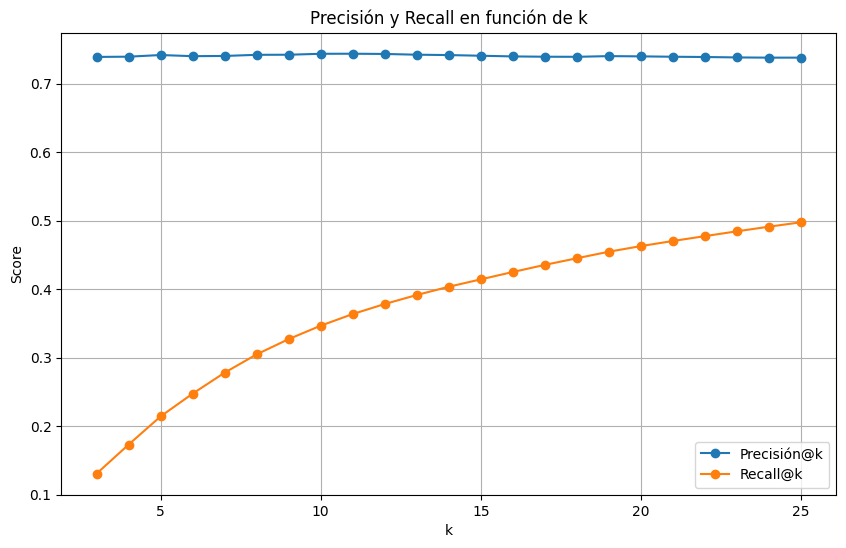

In [125]:
ks = range(3, 26)
precision_scores = []
recall_scores = []

for k in ks:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=k, threshold=3.5)
    precision_scores.append(sum(precisions.values()) / len(precisions))
    recall_scores.append(sum(recalls.values()) / len(recalls))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(ks, precision_scores, label='Precisión@k', marker='o')
plt.plot(ks, recall_scores, label='Recall@k', marker='o')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Precisión y Recall en función de k')
plt.legend()
plt.grid()
plt.show()

Siguiende del analisís del punto anterior, aquí vemos que el número de cervezas recomendadas (k) no tiene un impacto significativo en la precisión del modelo. Esto implica que se mantiene la proporción de cervezas recomendadas que le gustan a Carl vs las que no. Por su lado, el recal crece cconstantemente, lo cual es lógico pues al incluir más y más cervezas es lo más probable que captemos más cervezas que posiblemente le gusten a Carl.

### 2.4.5

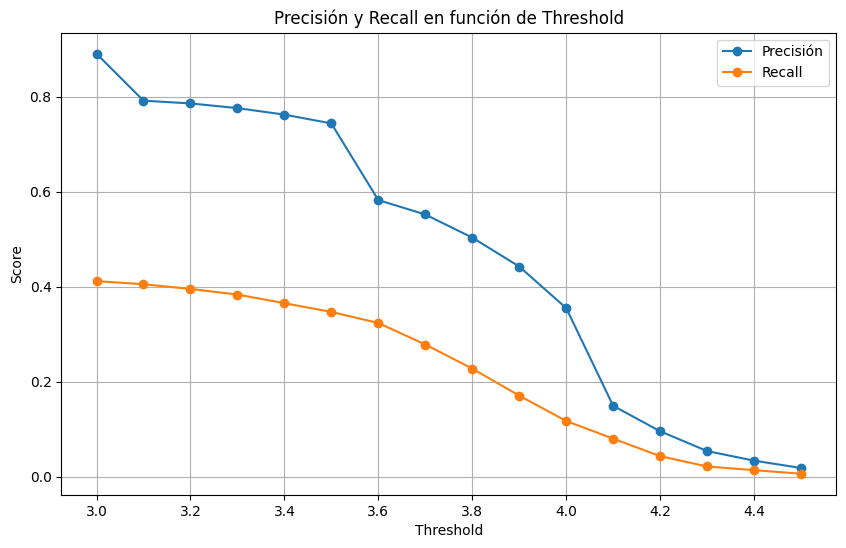

In [126]:
thresholds = [round(x, 1) for x in np.arange(3.0, 4.6, 0.1)]
precision_scores = []
recall_scores = []

for threshold in thresholds:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=threshold)
    precision_scores.append(sum(precisions.values()) / len(precisions))
    recall_scores.append(sum(recalls.values()) / len(recalls))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precisión', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precisión y Recall en función de Threshold')
plt.legend()
plt.grid()
plt.show()

En este apartado el comportamiento es distinto al anterior. Vemos que ambas métricas tienden a ir a la baja, puesto al aumentar el threshold nos ponemos más exigentes para catalogar una predicción como que "le gustó a Carl". Esto significa que cada vez tenemos menos cervezas que caerían en esta categoría, por lo que es más probable que alguna no le guste a Carl haciendo que baje considerablemente la métrica. Lo mismo pasa con el recall, pues al limitar tanto, es muy dificil que captemos todas las cervezas que le gusten a carl, dejando cad vez mpas cervezas que potencialmente le gustan fuera de nuestras prediccones.

### 2.4.6

In [127]:
# Crear matriz completa de ratings
all_predictions = svd_model.test(trainset.build_anti_testset())
ratings_matrix = pd.DataFrame(all_predictions).pivot(index='uid', columns='iid', values='est')

# Mostrar matriz sin valores nulos
ratings_matrix.fillna(0, inplace=True)
ratings_matrix.head()

iid,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
uid,,,,,,,,,,,,,,,,,,,,,
1,3.815023,3.952979,3.632585,3.742000,3.740974,3.767121,3.996164,3.978405,3.634586,3.925506,...,3.621689,4.012719,4.065470,4.180062,3.894141,4.050000,3.918958,4.132351,3.934664,3.628713
3,0.000000,0.000000,0.000000,0.000000,3.438216,3.467081,3.605124,3.600993,3.461516,3.604191,...,3.453819,3.770466,3.648301,3.763666,3.578856,3.784153,3.634532,3.825953,3.651519,3.356891
4,3.930611,4.069492,3.728559,3.853967,0.000000,3.915100,4.051689,4.013807,3.860474,4.058499,...,3.876862,4.191653,4.126336,4.219844,3.956162,4.192941,4.119000,4.315623,4.101311,3.795927
5,3.816360,3.987713,3.656966,3.610013,3.721588,0.000000,3.942917,3.827840,3.678574,3.898755,...,3.620080,4.157014,3.879815,4.227243,3.767524,3.943266,4.033725,4.052255,4.007928,3.632504
6,3.956389,3.946888,3.625678,3.790241,3.729811,3.792897,0.000000,3.768655,3.646322,3.914814,...,3.666042,3.965587,3.975499,4.065527,3.704471,4.025145,3.818206,4.185954,3.935951,3.682154


# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
